In [1]:
%cd ..

/workspaces/stuFootball360


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
def loadResults(basePath, names):
    result = {}
    for n in names:
        fn = os.path.join(basePath, n, "training.csv")
        result[n] = pd.read_csv(fn)
    return result

In [14]:
def drawGraphs(data, modelType, setnames, metric):

    params = {
        'font.size': 20,
        'legend.loc': 'upper right'
    }
    plt.rcParams.update(params)

    fig = plt.figure(figsize=(14,8))
    
    # Setup axes
    axes = fig.subplots(1, 1)
    yticks = [0.1, 0.06, 0.04, 0.03, 0.02, 0.01]
    axes.set_yscale("log")
    axes.set_yticks(yticks)
    axes.set_yticklabels(["$%.02f$" % y for y in yticks])
    axes.set_ylim(top=0.035, bottom=0.015)

    axes.set_xlabel("Epoch")
    axes.set_ylabel("MDLD")

    for s,sl,color in setnames:
        setname = "set" + s + "-" + modelType
        minVal = data[setname][metric].min()
        plt.plot(data[setname]["epoch"], data[setname][metric], color, label=sl, linewidth=2.0)
        plt.axhline(y=minVal, color=color, linestyle="--", linewidth=1.0)
        plt.text(-5, 0.0001 + minVal, "{:.7f}".format(minVal), color=color, fontsize="smaller")

    plt.legend()
    plt.show()
    plt.close()


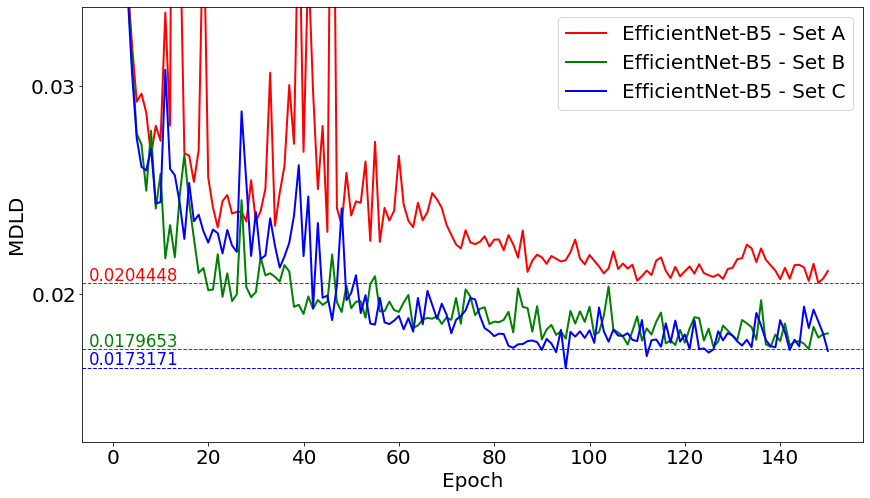

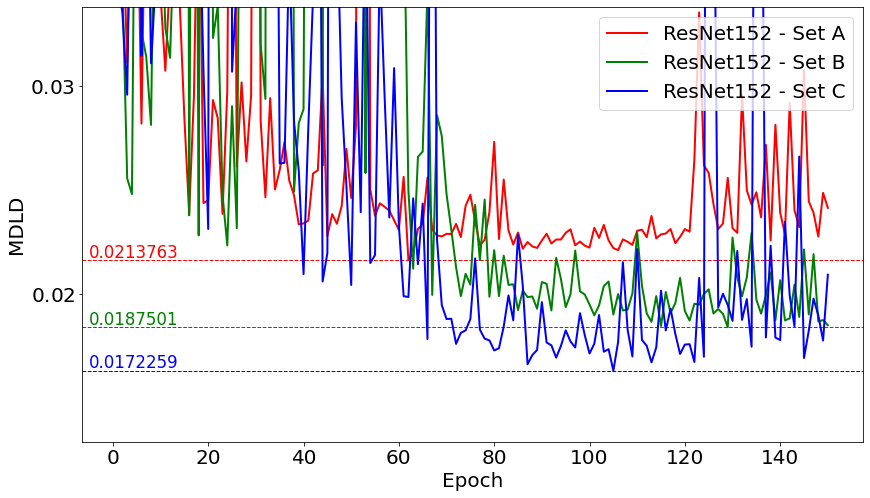

In [16]:
sets = [
    "seta-efficientnetb5", "setb-efficientnetb5", "setc-efficientnetb5",
    "seta-resnet152", "setb-resnet152", "setc-resnet152",
]
data = loadResults("data/results", sets)

drawGraphs(data, "efficientnetb5", 
    [   ("a", "EfficientNet-B5 - Set A", "r"), 
        ("b", "EfficientNet-B5 - Set B", "g"), 
        ("c", "EfficientNet-B5 - Set C", "b")
    ], 
    "mdldV"
)
drawGraphs(data, "resnet152", 
    [   ("a", "ResNet152 - Set A", "r"), 
        ("b", "ResNet152 - Set B", "g"), 
        ("c", "ResNet152 - Set C", "b")
    ], 
    "mdldV"
)
